<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="600" height="200"/>
</p></center>

<h1><center><font size=8>Bank Churn Prediction</center></font></h1>
<h1><center>Analitis, Iraklis - Project 7</center></h1>

#Introduction#

## Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.


### Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
 
**Data Dictionary**
- `CustomerId`: Unique ID which is assigned to each customer
- `Surname`: Last name of the customer 
- `CreditScore`: It defines the credit history of the customer.  
- `Geography`: A customer’s location    
- `Gender`: It defines the Gender of the customer   
- `Age`: Age of the customer     
- `Tenure`: Number of years for which the customer has been with the bank
- `NumOfProducts`: It refers to the number of products that a customer has purchased through the bank.
- `Balance`: Account balance
- `HasCrCard`: It is a categorical variable that decides whether the customer has a credit card or not.
- `EstimatedSalary`: Estimated salary 
- `isActiveMember`: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
- `Excited`: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )

**Loading the required libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics 
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule 
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

#### **Reading the Dataset**

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read .csv file to construct DataFrame object
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/UTAustinAIMLProjects/Project7/bank.csv')

#### Print the first five rows of the data

In [4]:
#Check first five rows and examine dataset structure
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Information about the data
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#Checking the shape of the data
data.shape

(10000, 14)

- Shape is 10000 entries and 14 columns in the dataset.

In [7]:
#finding the null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- No null values.

In [8]:
#Checking the dtypes of the variables in the data
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
## Storing required categorical variables in cat_dat for conversion
cat_data = ['Geography','Gender']

In [10]:
# Converting to categorical
for col in cat_data:
  data[col] = data[col].astype('category')

In [11]:
# Converting names to type string
data.Surname = data.Surname.astype('string')

In [12]:
#Checking data types
data.dtypes

RowNumber             int64
CustomerId            int64
Surname              string
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

- All columns are the desired data types.

In [13]:
# Storing all numerical columns in num_cols
num_cols = ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

In [14]:
data.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

- Initial observation of the skewness on the dataset is that most of the columns seem to be normal, with a few exceptions.
- Our target variable column `Exited` is heavily right-skewed, suggesting that most customers in the set did not leave their bank.
- `NumOfProducts` and `Age` are also significantly right-skewed.
- `HasCrCard` is significantly left-skewed.

#EDA#

### Univariate Analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

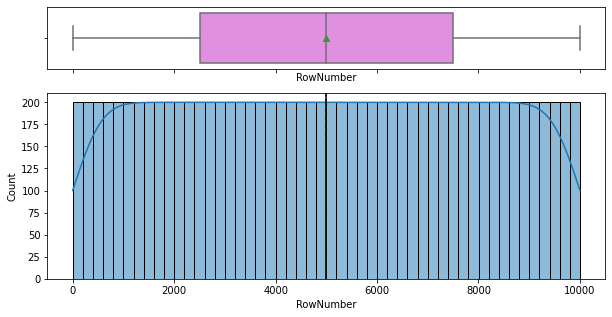

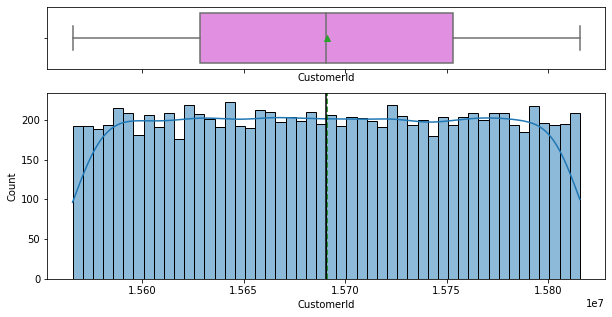

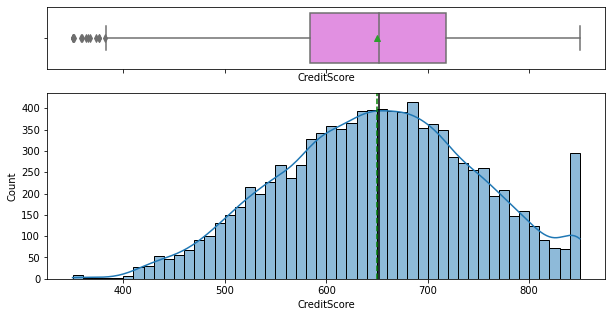

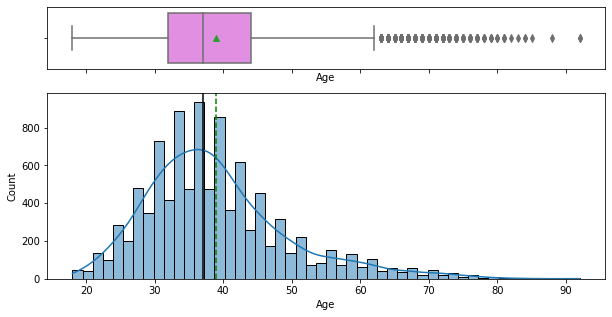

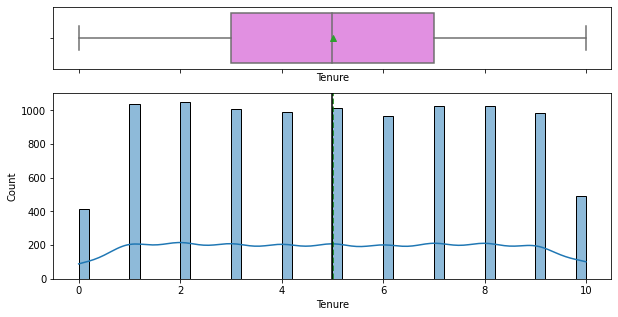

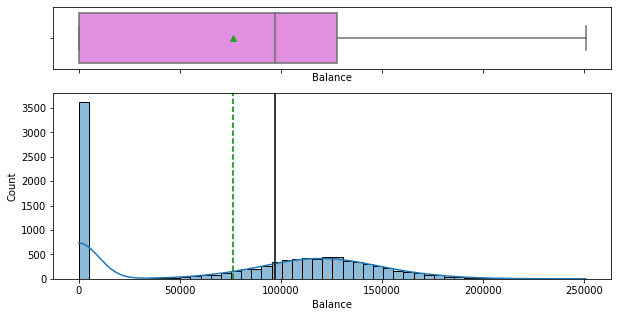

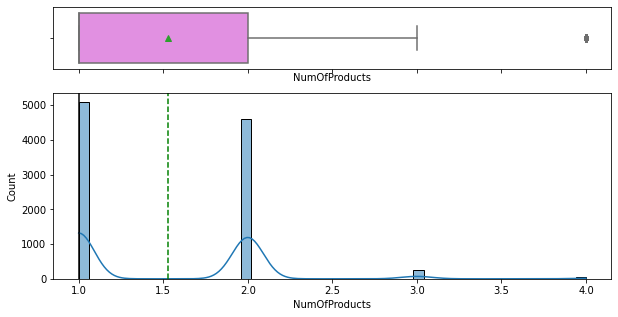

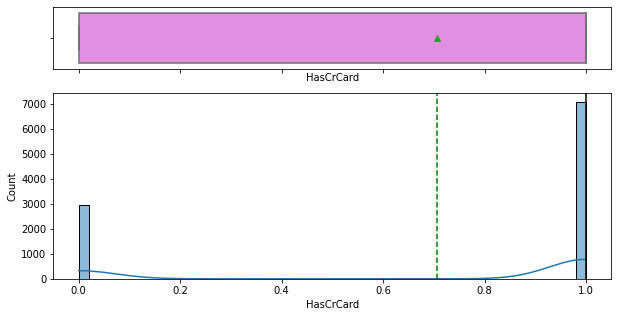

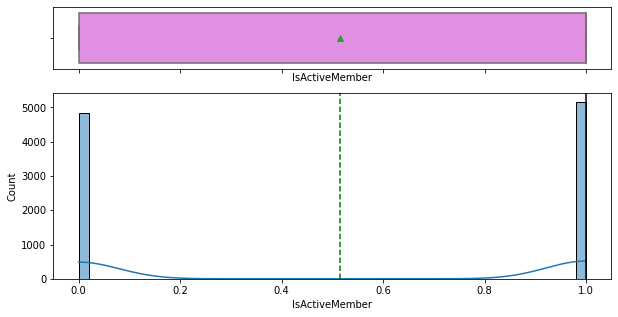

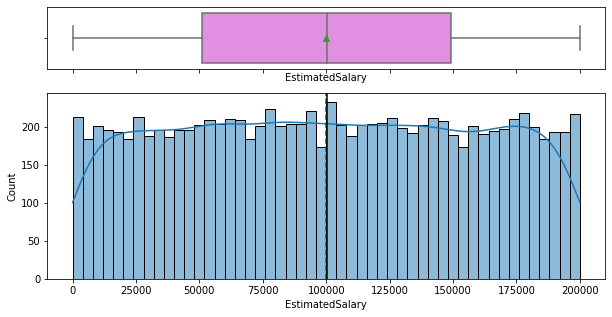

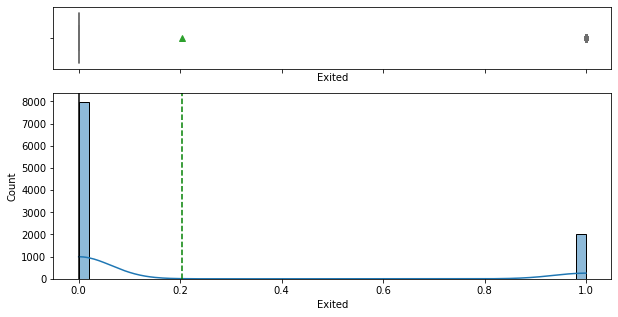

In [16]:
# selecting columns and plotting
for item in num_cols:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

**Observations**

- We see the already noted skews.
- Significant number of our numerical columns are binary or discrete, those that are not are quite normal, should suit well for modeling the data. 
- There are also a few outliers in some of the distributions.
- Those that appear to be identifiers like `CustomerId` and `RowNumber` can likely be dropped.

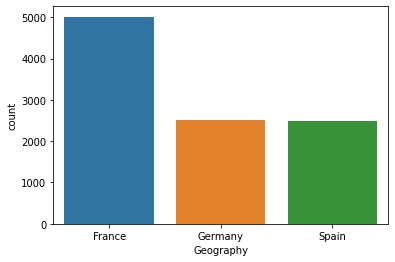

In [17]:
sns.countplot(x='Geography', data = data)

- Predominately French geography in this dataset, followed by seemingly equal representation from the French and Spanish.

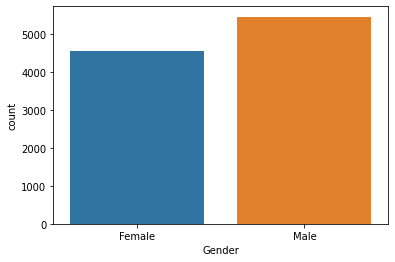

In [18]:
sns.countplot(x='Gender', data = data)

- Slight dominance of Males in this set.

### Bivariate Analysis

**Let's check for correlations.**

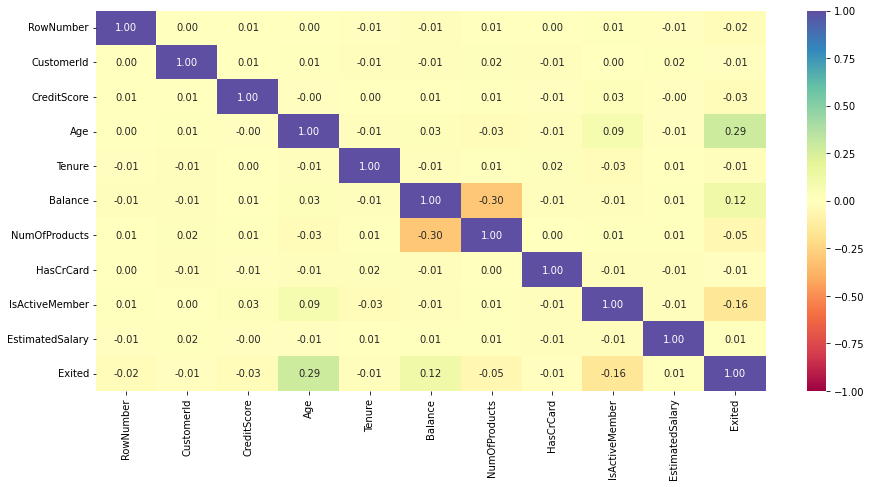

In [19]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

- On our target column `Exited` we see little to no correlation with the other numerical data columns.
- The most significant correlation is between `Exited` and `Age` suggesting that older members are more likely to leave the bank, but the correlation is quite weak.
- `NumOfProducts` and `Balance` also notably have a weak negative correlation with each other.

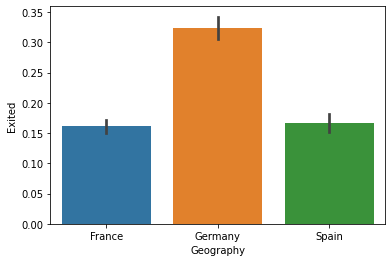

In [20]:
sns.barplot(x='Geography', y = 'Exited', data = data)

- Germans are notably the most likely to leave the bank, with double the exit rate of the other two countries.
- France seems to have the tightest IQR on this rate plot.

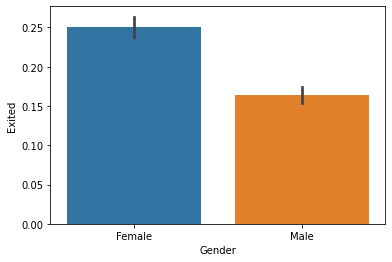

In [21]:
sns.barplot(x='Gender', y = 'Exited', data = data)

- Females signifcantly more likely to leave the bank.

# Data Pre-Processing

In [22]:
##Splitting Independent and dependent variable in X and Y respectively
X = data.drop(['Exited', 'RowNumber', 'Surname', 'CustomerId'],axis=1)
Y = data[['Exited']]

print(X.shape)
print(Y.shape)
print(type(X))

(10000, 10)
(10000, 1)
<class 'pandas.core.frame.DataFrame'>


In [23]:
# Splitting the dataset into the Training and Testing set.
X_big, X_test, y_big, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 5,shuffle = True)

In [24]:
# Splitting the dataset into the Training and validation set.
X_train, X_val, y_train, y_val = train_test_split(X_big,y_big, test_size = 0.3, random_state = 5,shuffle = True)

In [25]:
# Examine first 5 of training set
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6222,582,France,Male,31,2,0.00,2,1,1,33747.03
4085,520,France,Male,34,4,134007.90,1,1,1,193209.11
6328,790,Spain,Female,41,7,109508.68,1,0,0,86776.38
2594,537,Germany,Female,47,6,103163.35,1,1,0,16259.64
9987,606,Spain,Male,30,8,180307.73,2,1,1,1914.41


**Normalizing**

In [26]:
## Scaling the data
sc=StandardScaler()
temp = sc.fit(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']])
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']] = temp.transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']])
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']] = temp.transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']])
X_val[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']] = temp.transform(X_val[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']])

In [27]:
# Scaling the Target variable (contionous variable) 
y_train = sc.fit_transform(y_train)  
y_val_scale = sc.transform(y_val)

**Categorical Encoding**

In [28]:
# Using pd.get dummies to encode the categorical columns in the data
X_train = pd.get_dummies(X_train,columns=cat_data,drop_first= True)
X_test = pd.get_dummies(X_test,columns=cat_data,drop_first= True)
X_val = pd.get_dummies(X_val,columns=cat_data,drop_first= True)   

In [29]:
# Checking the shape
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6300, 11)
(2700, 11)
(6300, 1)
(2700, 1)
(1000, 11)
(1000, 1)


In [30]:
# Aligning the different sizes
X_train,X_test = X_train.align(X_test,join='outer',axis=1,fill_value=0)
X_train,X_val = X_train.align(X_val,join='outer',axis=1,fill_value=0)

In [31]:
# Checking the shape
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6300, 11)
(2700, 11)
(6300, 1)
(2700, 1)
(1000, 11)
(1000, 1)


# Model Building

#### Model-1

In [32]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [33]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model.add(Dense(1, activation='linear'))

In [34]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,937
Trainable params: 3,937
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Initializing the Optimizer
optimizer = RMSprop( learning_rate=0.001)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
# Fitting the model on train and validation with 50 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50)

Epoch 1/50
197/197 [==============================] - 2s 4ms/step - loss: 0.8530 - mae: 0.6882 - val_loss: 0.7692 - val_mae: 0.6753
Epoch 2/50
197/197 [==============================] - 1s 3ms/step - loss: 0.7337 - mae: 0.6176 - val_loss: 0.7226 - val_mae: 0.5797
Epoch 3/50
197/197 [==============================] - 1s 3ms/step - loss: 0.6906 - mae: 0.5881 - val_loss: 0.6950 - val_mae: 0.5680
Epoch 4/50
197/197 [==============================] - 1s 3ms/step - loss: 0.6670 - mae: 0.5703 - val_loss: 0.6985 - val_mae: 0.5514
Epoch 5/50
197/197 [==============================] - 1s 3ms/step - loss: 0.6530 - mae: 0.5615 - val_loss: 0.6868 - val_mae: 0.5509
Epoch 6/50
197/197 [==============================] - 1s 3ms/step - loss: 0.6406 - mae: 0.5483 - val_loss: 0.6950 - val_mae: 0.5926
Epoch 7/50
197/197 [==============================] - 1s 3ms/step - loss: 0.6313 - mae: 0.5430 - val_loss: 0.6907 - val_mae: 0.5999
Epoch 8/50
197/197 [==============================] - 1s 3ms/step - loss: 0.

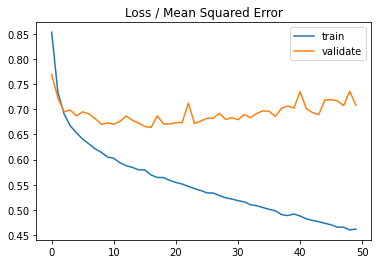

In [36]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

- Seems to be over fitted.



In [37]:
#Lets predict on validation data
Y_result_scaled= model.predict(X_val)
##As we have scaled the target variable, now after predicting we should inverse the scale and convert it to normal form
Y_result = sc.inverse_transform(Y_result_scaled) 
print(Y_result)

85/85 [==============================] - 0s 2ms/step
[[0.10569898]
 [0.07157589]
 [0.0934825 ]
 ...
 [0.11549212]
 [0.09850616]
 [0.03686587]]


In [38]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
def model_performance_regression(predictors,target,pred):
  r2 = r2_score(target, pred)  # to compute R-squared
  adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
  rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
  mae = mean_absolute_error(target, pred)  # to compute MAE

  df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

  return df_perf

In [39]:
# Checking model performance on train set
print("Validation Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result)
model_train_perf

Validation Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.338252,0.223368,0.297491,0.294616


#### Model-2

In [40]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [41]:
# Initializing the model
model_2 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_2.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_2.add(Dense(1, activation='linear'))

In [42]:
# Model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,937
Trainable params: 3,937
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Initializing the Optimizer
optimizer = Adam( learning_rate=0.001)
# Compiling the model with 'mse' as loss function and metrics
model_2.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50,callbacks=es_cb)

Epoch 1/50
197/197 [==============================] - 2s 7ms/step - loss: 0.8631 - mae: 0.6979 - val_loss: 0.7590 - val_mae: 0.6599
Epoch 2/50
197/197 [==============================] - 1s 4ms/step - loss: 0.7318 - mae: 0.6170 - val_loss: 0.7112 - val_mae: 0.6159
Epoch 3/50
197/197 [==============================] - 1s 4ms/step - loss: 0.6893 - mae: 0.5896 - val_loss: 0.6954 - val_mae: 0.5875
Epoch 4/50
197/197 [==============================] - 1s 4ms/step - loss: 0.6624 - mae: 0.5701 - val_loss: 0.6966 - val_mae: 0.6023
Epoch 5/50
197/197 [==============================] - 1s 4ms/step - loss: 0.6462 - mae: 0.5599 - val_loss: 0.6790 - val_mae: 0.5518
Epoch 6/50
197/197 [==============================] - 1s 4ms/step - loss: 0.6358 - mae: 0.5471 - val_loss: 0.6790 - val_mae: 0.5629
Epoch 7/50
197/197 [==============================] - 1s 4ms/step - loss: 0.6269 - mae: 0.5419 - val_loss: 0.6793 - val_mae: 0.5801
Epoch 8/50
197/197 [==============================] - 1s 4ms/step - loss: 0.

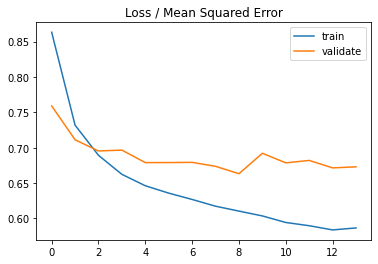

In [44]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history_2.history['loss'], label='train')
pyplot.plot(history_2.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

* The curves still seem to be overfitted, but smoothing out more due to early stop and Adam optimization.

In [45]:
#Lets predict on validation data
Y_result_scaled_2= model_2.predict(X_val)
##As we have scaled the target variable, now after predicting we should inverse the scale and should convert to normal form
Y_result2 = sc.inverse_transform(Y_result_scaled_2) 
print(Y_result2)

85/85 [==============================] - 0s 2ms/step
[[ 0.12477761]
 [-0.02363267]
 [-0.05722442]
 ...
 [ 0.08754735]
 [ 0.06076991]
 [ 0.06728218]]


In [46]:
# Checking model performance on train set
print("Validation Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result2)
model_train_perf

Validation Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.329889,0.21325,0.3318,0.329066


- Adjusted R-Squared has improved from the previous model.

#### Model-3

In [47]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [48]:
# Initializing the model
model_3 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_3.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding Dropout with 20%
model_3.add(Dropout(0.2))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding Dropout with 10%
model_3.add(Dropout(0.2))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_3.add(Dense(1, activation='linear'))

In [49]:
# Model summary
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainabl

In [50]:
# Initializing the Optimizer
optimizer = Adam(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_3.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_3 = model_3.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50,callbacks=es_cb)

Epoch 1/50
197/197 [==============================] - 1s 4ms/step - loss: 1.0569 - mae: 0.7874 - val_loss: 0.8409 - val_mae: 0.7064
Epoch 2/50
197/197 [==============================] - 1s 3ms/step - loss: 0.8696 - mae: 0.7063 - val_loss: 0.7763 - val_mae: 0.6579
Epoch 3/50
197/197 [==============================] - 1s 3ms/step - loss: 0.8282 - mae: 0.6836 - val_loss: 0.7369 - val_mae: 0.6253
Epoch 4/50
197/197 [==============================] - 1s 3ms/step - loss: 0.7938 - mae: 0.6554 - val_loss: 0.7240 - val_mae: 0.6010
Epoch 5/50
197/197 [==============================] - 1s 3ms/step - loss: 0.7709 - mae: 0.6389 - val_loss: 0.7009 - val_mae: 0.5901
Epoch 6/50
197/197 [==============================] - 1s 3ms/step - loss: 0.7542 - mae: 0.6234 - val_loss: 0.6934 - val_mae: 0.5768
Epoch 7/50
197/197 [==============================] - 1s 3ms/step - loss: 0.7431 - mae: 0.6119 - val_loss: 0.6881 - val_mae: 0.5772
Epoch 8/50
197/197 [==============================] - 1s 3ms/step - loss: 0.

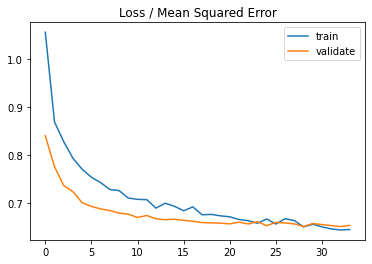

In [51]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history_3.history['loss'], label='train')
pyplot.plot(history_3.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

- The curves are now smooth after introducing the dropout method.

In [52]:
Y_result_scaled_3= model_3.predict(X_val)
Y_result_3 = sc.inverse_transform(Y_result_scaled_3)
print(Y_result_3)

85/85 [==============================] - 0s 2ms/step
[[0.13111784]
 [0.07142404]
 [0.06926272]
 ...
 [0.05554896]
 [0.07200856]
 [0.10531175]]


In [53]:
# Checking model performance on train set
print("Validation Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result_3)
model_train_perf

Validation Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.325147,0.21633,0.350871,0.348214


- The Adjusted R-Square has increased again relative to the previous model.

#### Model-4

In [54]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [55]:
# Initializing the model
model_4 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_4.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_4.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding Batch Normalization
model_4.add(BatchNormalization())
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_4.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_4.add(Dense(1, activation='linear'))

In [56]:
# Model summary
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,065
Trainable params: 4,001
Non-trainable params: 64
_____________________________________________________

In [57]:
# Initializing the Optimizer
optimizer = Adam(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_4.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_4 = model_4.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50,callbacks=es_cb)

Epoch 1/50
197/197 [==============================] - 2s 5ms/step - loss: 0.9716 - mae: 0.7447 - val_loss: 0.7756 - val_mae: 0.6619
Epoch 2/50
197/197 [==============================] - 1s 4ms/step - loss: 0.7533 - mae: 0.6347 - val_loss: 0.7311 - val_mae: 0.6228
Epoch 3/50
197/197 [==============================] - 1s 4ms/step - loss: 0.7109 - mae: 0.6072 - val_loss: 0.7261 - val_mae: 0.6017
Epoch 4/50
197/197 [==============================] - 1s 4ms/step - loss: 0.6885 - mae: 0.5894 - val_loss: 0.7310 - val_mae: 0.5836
Epoch 5/50
197/197 [==============================] - 1s 4ms/step - loss: 0.6713 - mae: 0.5766 - val_loss: 0.7038 - val_mae: 0.5608
Epoch 6/50
197/197 [==============================] - 1s 4ms/step - loss: 0.6585 - mae: 0.5674 - val_loss: 0.7054 - val_mae: 0.5609
Epoch 7/50
197/197 [==============================] - 1s 4ms/step - loss: 0.6474 - mae: 0.5600 - val_loss: 0.6923 - val_mae: 0.5586
Epoch 8/50
197/197 [==============================] - 1s 4ms/step - loss: 0.

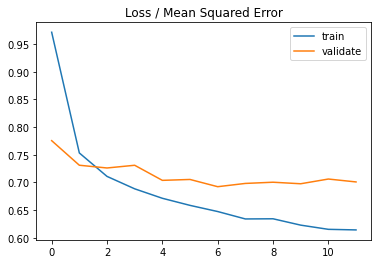

In [58]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history_4.history['loss'], label='train')
pyplot.plot(history_4.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

- The curves are still smooth, but this seems to be overfitting more than the previous model.

In [59]:
Y_result_scaled_4= model_4.predict(X_val)
Y_result_4 = sc.inverse_transform(Y_result_scaled_4)
print(Y_result_4)

85/85 [==============================] - 0s 2ms/step
[[-0.02487032]
 [ 0.162824  ]
 [ 0.03723823]
 ...
 [-0.05929726]
 [-0.07785132]
 [ 0.09683864]]


In [60]:
# Checking model performance on train set
print("Validation Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result_4)
model_train_perf

Validation Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.33666,0.221664,0.304089,0.301241


* BatchNormalization technique did not perform well and we saw a significant decrease in Adjusted R-Squared value.

### Model-5

In [61]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [62]:
# Initializing the model
model_5 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_5.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
# Adding dropout with ratio of 0.1
model_5.add(Dropout(0.2))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding dropout with ratio of 0.1
model_5.add(Dropout(0.1))
# Adding the second hidden layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the third hidden layer with 8 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_5.add(Dense(1, activation='linear'))

In [63]:
# Model summary
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9

In [ ]:
# Initializing the Optimizer
optimizer = Adam(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_5.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
# Adding the callbacks
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_5 = model_5.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50,callbacks=es_cb)

Epoch 1/50
197/197 [==============================] - 2s 4ms/step - loss: 1.0352 - mae: 0.8278 - val_loss: 0.9506 - val_mae: 0.7940
Epoch 2/50
197/197 [==============================] - 1s 4ms/step - loss: 0.9110 - mae: 0.7574 - val_loss: 0.8099 - val_mae: 0.6987
Epoch 3/50
197/197 [==============================] - 1s 3ms/step - loss: 0.8154 - mae: 0.6804 - val_loss: 0.7239 - val_mae: 0.6073
Epoch 4/50
197/197 [==============================] - 1s 4ms/step - loss: 0.7729 - mae: 0.6283 - val_loss: 0.6939 - val_mae: 0.5857
Epoch 5/50
197/197 [==============================] - 1s 3ms/step - loss: 0.7440 - mae: 0.6083 - val_loss: 0.6781 - val_mae: 0.5705
Epoch 6/50
197/197 [==============================] - 1s 3ms/step - loss: 0.7153 - mae: 0.5888 - val_loss: 0.6749 - val_mae: 0.5476
Epoch 7/50
197/197 [==============================] - 1s 4ms/step - loss: 0.7064 - mae: 0.5757 - val_loss: 0.6689 - val_mae: 0.5587
Epoch 8/50
197/197 [==============================] - 1s 4ms/step - loss: 0.

In [ ]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history_5.history['loss'], label='train')
pyplot.plot(history_5.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

* Both the curves are quite smooth with inrceasing layers in this model.

In [ ]:
Y_result_scaled_5= model_5.predict(X_val)
Y_result_5 = sc.inverse_transform(Y_result_scaled_5)
print(Y_result_5)

In [ ]:
# Checking model performance on train set
print("Validation Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result_5)
model_train_perf

The Adjusted R-square of the model increased, and increasing the number of layers did work to improve the metrics any further.

Out of all the models built, this final model seems to perform the best.

####**Test Prediction**

In [ ]:
# Predicting on test dat
test_pred = model_5.predict(X_test)
##As we have scaled the target variable, now after predicting we should inverse the scale and should convert to normal form
test_pred = sc.inverse_transform(test_pred)
print(test_pred)

In [ ]:
# Checking model performance on train set
print("Training Performance\n")
model_train_perf = model_performance_regression(X_test,y_test, test_pred)
model_train_perf

- The training performance is quite good with this final model and can likely be used in further predictive analysis by the bank.

#Conclusions and Key Takeaways



- The data that has been split from the original dataset has been properly scaled and features that would interfere with the model development have been properly dropped without significant loss on the accuracy or validity of these models. 
- We have developed a few models that performs well in validation testing and has acceptable performance when applied to the training set, we have selected the optimal model and applied it to the training set with great results.
- We were able to identify through initial analysis of the data that concerning customers exiting the bank, the Females, the older members, and the German customers, were individually more likely to leave the bank when compared to the rest of the set. This can be explored further within the models seen above.
- Further analysis is encouraged and we have provided the business the tools to do so or have set ourselves up for a great business opportunity to leverage this work further as a consultant to the bank to provide them more insights.
